<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Multialternative-Dynamic-Decision-Process" data-toc-modified-id="Multialternative-Dynamic-Decision-Process-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Multialternative Dynamic Decision Process</a></span><ul class="toc-item"><li><span><a href="#Valences" data-toc-modified-id="Valences-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Valences</a></span><ul class="toc-item"><li><span><a href="#Personal-Evaluation" data-toc-modified-id="Personal-Evaluation-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Personal Evaluation</a></span></li><li><span><a href="#Attention-Weight" data-toc-modified-id="Attention-Weight-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Attention Weight</a></span></li><li><span><a href="#Comparison-Process" data-toc-modified-id="Comparison-Process-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Comparison Process</a></span></li></ul></li><li><span><a href="#Preferences" data-toc-modified-id="Preferences-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Preferences</a></span></li><li><span><a href="#Initial-Preference-State" data-toc-modified-id="Initial-Preference-State-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Initial Preference State</a></span></li></ul></li></ul></div>

---

By: Daniel J Wilson
Date: March 21, 2018

Adapted from [Roe et al. 2001](https://www.ncbi.nlm.nih.gov/pubmed/11381834)

---

In [2]:
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt

# Multialternative Dynamic Decision Process

---

* Sequential Sampling Model
* Extends application of earlier models to multialternative preferential choice

## Valences

---

At any moment in time, each alternative in the choice set is associated with a valence value

---

The valence of option *i* at time *t* is written as:

$$v_i(t)$$

This represents the **value** of option *i* at time *t*.

---

The ordered set of **valences** for all options is written as:

$$\vec V$$

---

**EXAMPLE**

Three alternatives, A, B and C = set {A, B, C}

This would be represented by the vector:

$$\vec V (t) = [v_a(t), v_b(t), v_c(t)]'$$

---

**Valence** of each **option** consists of THREE components:

1. Personal evaluation

2. Attention weight

3. Comparison Process

### Personal Evaluation

---

Subjective value of a given attribute on a single option

---

$$m_{ij}$$

Where $m_{ij}$ denotes the subjective value of **option** $i$ on **attribute** $j$

---

**EXAMPLE**

Three cars (options): $\vec M = [m_A, m_B, m_C]'$ 

Being considered on the attributes of:

ECONOMY: $\vec M_E = [m_{AE}, m_{BE}, m_{CE}]'$

QUALITY: $\vec Q_E = [m_{AQ}, m_{BQ}, m_{CQ}]'$

---

In [3]:
# Create Dataframe with example options

cars = np.array([['', 'Economy', 'Quality'],
                ['Car_A', 2, 9],
                ['Car_B', 3, 7],
                ['Car_C', 8, 4],
                ])

M = (pd.DataFrame(data=cars[1:,1:],
                  index=cars[1:,0],
                  columns=cars[0,1:]))

# make sure things are numeric for later
M.Economy = pd.to_numeric(M.Economy)
M.Quality = pd.to_numeric(M.Quality)

---

**PERSONAL EVALUATION VECTOR**

These vectors join to produce a 3 x 2 value matrix:

$$\vec M = [\vec M_E|\vec M_Q]$$

---

In [4]:
# View Dataframe/matrix

M

,Economy,Quality
Car_A,2,9
Car_B,3,7
Car_C,8,4


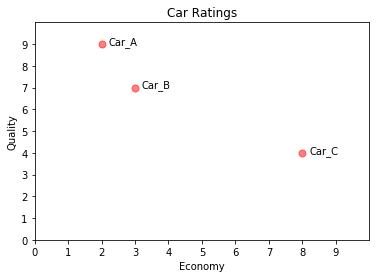

In [5]:
# Plot Cars Dataframe (M)

fig, ax = plt.subplots()
plt.scatter(M.Economy, M.Quality, s=50, c='red', alpha=0.5)

for i in range(M.shape[0]):
    plt.text(M.Economy[i]+0.2, M.Quality[i], str(M.index[i]))
    
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0,10,1))
ax.set_xlabel('Economy')

ax.set_ylim(0, 10)
ax.set_yticks(np.arange(0,10,1))
ax.set_ylabel('Quality')

ax.set_title('Car Ratings')

#ax.grid(True)
plt.show()

### Attention Weight

---

Attention given to each attribute (can vary from moment to moment)

---

$$W_{j}$$

Where $W_{j}(t)$ denotes the meomentary attention on **attribute** $j$ at **time** $t$.

---

**QUESTION**

Why not:

$$w_{ij}(t)$$

Where $w_{ij}(t)$ denotes the momentary attention of **option** $i$ on **attribute** $j$ at **time** $t$?

---

**ASSUMPTION**

Attention shifts in an all or nothing manner from one attribute at one moment:

$$W_Q(t) = 1, W_E(t) = 0$$

to another attribute at another moment:

$$W_Q(t) = 0, W_E(t) = 1$$

---

**ATTENTION PROBABILITY**

In the car example the probability of attending to the *economy* attribute is: $w_E$

The probability of attending to the *quality* attribute is: $w_Q$

---

**ATTENTION WEIGHT VECTOR**

Attention weights for all attributes at a given time make a **weight vector**:

$$\vec W(t)$$

In the car example the weight vector is two-dimensional:

$$\vec W(t) = [W_E(t)W_Q(t)]'$$

---

In [45]:
# Lets create some arbitrary weights then...

# Economy weight for 10 time points
W_E = np.random.randint(2, size=(10))

# Quality weight for 10 time points
W_Q = abs(W_E - 1)

# Create a numpy array from these two vectors
weights = np.array([W_E, W_Q]).T

# Convert the array into a pandas Dataframe
W = (pd.DataFrame(data=weights,
                           columns = ['Economy', 'Quality']
                          ))

# Take a look (this will be different every time you run it due to the random function)
W

,Economy,Quality
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,1,0
8,0,1
9,0,1


In [46]:
# Lets look at the weighted attribute values for each car at time point 3

# Set timepoint of interest
t = 3

# Create array of weights
W_t = np.ones((3,2), dtype = int) * np.array([W.iloc[t]])

# Convert the array into a pandas Dataframe (this is not necessary, just a bit easier to interpret)
W_t = (pd.DataFrame(data=W_t,
                    columns = ['Economy', 'Quality'],
                    index = ['Car_A', 'Car_B', 'Car_C']
                          ))

# Take a look at this Dataframe
W_t

,Economy,Quality
Car_A,0,1
Car_B,0,1
Car_C,0,1


---

**WEIGHTED VALUE**

The weighted value is the matrix product of weights and values:

$$\vec M\vec W(t)$$


---

**EXAMPLE**

When choosing among three cars, the $i$th row is:

$$\vec M\vec W(t) = W_E(t)m_{iE} + W_Q(t)m_{iQ}$$

---

In [47]:
# For t = 3

print('MW(t) = \n{0}\n'.format(M * W.iloc[3]))

# which is the same as:

print('WE(t)miE + WQ(t)miQ = \n{0}\n'.format(W.Economy[3]*M.Economy + W.Quality[3]*M.Quality))


MW(t) = 
       Economy  Quality
Car_A        0        9
Car_B        0        7
Car_C        0        4

WE(t)miE + WQ(t)miQ = 
Car_A    9
Car_B    7
Car_C    4
dtype: int64



In [48]:
# A bit more legibly, where W_t has been set to W(t) = W(3) above:

M_Wt = M * W_t
M_Wt

,Economy,Quality
Car_A,0,9
Car_B,0,7
Car_C,0,4


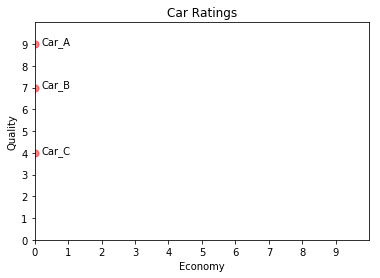

In [49]:
# Plot Cars Dataframe (M) Weighted by attention at time t = 3

fig, ax = plt.subplots()
plt.scatter(M_Wt.Economy, M_Wt.Quality, s=50, c='red', alpha=0.5)

for i in range(M_Wt.shape[0]):
    plt.text(M_Wt.Economy[i]+0.2, M_Wt.Quality[i], str(M_Wt.index[i]))
    
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0,10,1))
ax.set_xlabel('Economy')

ax.set_ylim(0, 10)
ax.set_yticks(np.arange(0,10,1))
ax.set_ylabel('Quality')

ax.set_title('Car Ratings')

#ax.grid(True)
plt.show()

---

**NOTE**

Unlike the classic weighted utility model, the weighted values are **stochastic** because of fluctuations in the attention weights (in this example $W_E(t)$ and $W_Q(t)$

---

### Comparison Process

---

Contrasts the weighted evaluations of each option

---

**GENERAL CONCEPT**

Valence of each option is produced by contrasting the weighted value of one alternative against the average of all the others.

---

**EXAMPLE**

Three alternatives (cars): {A, B, C}

Valence for option A:

$$v_A(t) = W_E(t)m_{AE} + W_Q(t)m_{AQ} - [W_E(t)m_{BE} + W_Q(t)m_{BQ} + W_E(t)m_{CE} + W_Q(t)m_{CQ}]/2$$

---

In [53]:
W.Quality[3]*M.Quality['Car_A']

9

In [67]:
# Using the values from 1.1.2 lets calculate this for t = 3 (change 't' to see other values)
t = 3

Val_A_t = W.Economy[t]*M.Economy['Car_A'] + W.Quality[t]*M.Quality['Car_A'] \
           - (W.Economy[t]*M.Economy['Car_B'] + W.Quality[t]*M.Quality['Car_B'] +
              W.Economy[t]*M.Economy['Car_C'] + W.Quality[t]*M.Quality['Car_C'])/2

print('Valence for Car A at time {0} = {1}'.format(t, Val_A_t))

Valence for Car A at time 3 = 3.5


---
**CONTRAST MATRIX**

$$\vec C= \begin{bmatrix}
    1 & -\frac{1}{2} & -\frac{1}{2}\\
    -\frac{1}{2} & 1 & -\frac{1}{2}\\
    -\frac{1}{2} & -\frac{1}{2} & 1
\end{bmatrix}$$

---

**VALENCE VECTOR**

$$\vec V(t) = \vec C\vec M\vec W(t)$$

This equation can be used for ***any*** number of *alternatives* and *attributes*.

---

In [68]:
# Lets try this

# First create the matrix C

C = np.array([[1, -0.5, -0.5], [-0.5, 1, -0.5], [-0.5, -0.5, 1]])
C

array([[ 1. , -0.5, -0.5],
       [-0.5,  1. , -0.5],
       [-0.5, -0.5,  1. ]])

In [100]:
# Then write the matrix product equation

# Change 't' value if you like
t = 3

# V(t) = CMW(t)
V_t = C.dot(M).dot(W.iloc[t])

print('Valence vector = \n{0}\n'.format(V_t))
print('In other words:\nCar A Valence at t={0} is {1}\nCar B Valence at t={0} is {2}\nCar C Valence at t={0} is {3}\n'.format(t, V_t[0], V_t[1], V_t[2]))

Valence vector = 
[ 3.5  0.5 -4. ]

In other words:
Car A Valence at t=3 is 3.5
Car B Valence at t=3 is 0.5
Car C Valence at t=3 is -4.0



---

**NOISE**

The authors assume that most choices often involve **primary** and **secondary** (irrelevant) attributes.

Under this assumption they divide a $p$-dimensional attention weight vector into two components:

$$\vec W(t)' = [\vec W_1(t)', \vec W_2(t)']$$ 

$\vec W_1(t)$ = **primary** dimensions/attributes ($q$-dimensional)

$\vec W_2(t)$ = **secondary/irrelevant** dimensions/attributes ($p-q$-dimensional)

This means the **Valence Vector** can be rewritten to:

$$\vec V(t) = \vec C\vec M\vec W(t) = \vec C\vec M_1\vec W_1(t) + \epsilon(t)$$

$\epsilon(t) = \vec C\vec M_2\vec W_2(t)$ and can be treated as a **stochastic error** or **residual** term.

---

## Preferences

---

At any moment in time, each alternative in the choice set is associated with a preference strength

---

$P_i(t)$ = Preference strength for alternative $i$ at time $t$

Represents the **integration** of all **valences** considered for alternative $i$ up to that point in time.

---

$\vec P(t)$ = Preference state vector

Represents the preference for all alternatives at time $t$.

---

**EXAMPLE**

For three options, {A, B, C}

$$\vec P(t) = [P_A(T), P_B(t), P_C(t)]'$$

---

For time $t + 1$:

$$\vec P(t + 1)$ = $\vec P(t)$ + $\vec V(t)$$  

Where $\vec V(t)$ = **new** input valence vector

---

**EQUATION**: Linear Stochastic Difference Equation

$$\vec P(t+1) = \vec S\vec P(t) + \vec V(t+1)$$

Note that the new preference state $\vec P(t+1)$ is a **weighted combination** of:

*Previous preference state + New input valence*

---

The **dynamic** behavior of the model is determined by two factors.

1. $\vec P(0)$ = initial preference state
2. $\vec S$ = feedback matrix

---

## Initial Preference State

---

Residual bias from previous experience (if present)